<a href="https://colab.research.google.com/github/Raphael-Blaize/HOSPITAL-HYPOTHYROIDISM-ANALYSIS-AND-PREDICTIONS-/blob/main/NAIROBI_HOSPITAL_(HYPOTHYROIDISM_ANALYSIS_AND_PREDICTIONS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIROBI HOSPITAL (HYPOTHYROIDISM ANALYSIS AND PREDICTIONS)

## 1. Defining the Question

### a) Specifying the Question


> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

> Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.




### b) Defining the Metric for Success

> Able to predcit the hypothyroid based on: 

        1. Different predictor varibles

> Able to use different Decision trees and SVM models

> No multicollinearity in the dataset in-order to acchive accurate results 

> Ensuring that the data has been preproccesed well this includes:

        1. Taking care of Outliers
        2. Taking care of missing values 
        3. Taking care of column names 
        4. Taking care of special character if there is any

> Ensuring that my dataset has also been encoded properly before applying it to the model for training 

### c) Understanding the context 

**OVERVIEW**

> Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

> Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

> Accurate thyroid function tests are available to diagnose hypothyroidism. Treatment with synthetic thyroid hormone is usually simple, safe and effective once you and your doctor find the right dose for you.


### d) Recording the Experimental Design

> We will be conducting an EDA Analysis of the data in -order to understand the relationship in the variables by:

         1. Univariate analysis
         2. Bivarate analysis 
         3. Multi-variate analysis where needed

> We will also see the correlation between the variables using: 

         1. Heatmap to see the correlation
         2. Pearsons correlation 
         3. Chi squared where possible 

**Modelling approach**
         
        1. Decision trees:
> For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.

> Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.

> Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction

> Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

        2. SVM



- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

         




## **DATASETS USED IN THIS ANALYSIS**

The Datset files used in this analysis are found from the link below

link : [Dataset](http://bit.ly/hypothyroid_data)









## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [103]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#Reading our dataset
hospital = pd.read_csv('hypothyroid.csv')
## reading the first 10 rows of our dataset
hospital.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


##### HOSPITAL DATASET PREPROCESSING SECTION

In [105]:
# checking the info on our ranking dataset 
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

we have 3163 entries and 25 columns 

In [106]:
#cheking for null values 
hospital.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

No null values in the dataset so there is no need to drop of fillna 

In [107]:
#cheking for duplicates in the dataset 
hospital.duplicated().sum()

77

There are a number of duplicatred values so i will have to drop them

In [108]:
#dropping the duplicated values 
hospital.drop_duplicates(keep = "first", inplace = True)

#cheking if they are any duplicates after dropping them 
hospital.duplicated().sum()

0

In [109]:
# Looking at the columns in hospital dataset
hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [110]:
# preprocessing my column names

# Ensuring my column names are in lower case to improve consitency
hospital.columns = hospital.columns.str.lower()

#Cheking the columns
hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [111]:
#cheking the unique values in the column names 

#for loop to iterate through each column
for column in hospital.columns:
  # creating a variable columnc which will be the the content in each column
  columnc = hospital[column]
  #Printing the column name
  print(column)
  #printing the unique values in the column
  print(columnc.unique())
  # printing the number of unique values in the column
  print(columnc.nunique())
  print("\n")

status
['hypothyroid' 'negative']
2


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93


sex
['M' 'F' '?']
3


on_thyroxine
['f' 't']
2


query_on_thyroxine
['f' 't']
2


on_antithyroid_medication
['f' 't']
2


thyroid_surgery
['f' 't']
2


query_hypothyroid
['f' 't']
2


query_hyperthyroid
['f' 't']
2


pregnant
['f' 't']
2


sick
['f' 't']
2


tumor
['f' 't']
2


lithium
['f' 't']
2


goitre
['f' 't']
2


tsh_measured
['y' 'n']
2


tsh
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '5

Some of the column names include '?'
    
    1. sex
    2. tbg

> This '?' could have been put there to represent the lack of any content or data in that specific column i will proceed to replace the "?", with NaN and then look through my null values again

In [112]:
# changiing the '?' to NaN in the columns
hospital.replace("?", np.nan, inplace = True)

In [113]:
#cheking the null values in the columns after replacing
hospital.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

From the above we can see that the sum of the total null values has increased but especially in tbg where the number of null values is almost the total number of entries we have so there is no need to keep that column as it may not give us any significant analysis or help us in modelling the other null values will be filled with zero

In [114]:
#droppping the tbg column 
hospital.drop(columns = ["tbg"], inplace=True)

#cheking if the column has been dropped 
hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

In [115]:
#filling the rest of the null columns with zero 
hospital.fillna(0, inplace = True)

# cheking to see if there any more missing values
hospital.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64

In [116]:
#cheking column types
hospital.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
dtype: object

we have to change some of the datatypes of the columns from object to their respective data types in the column wither float, int64 or boolean




In [117]:
#changing column datatype

# we will use a for loop but first we must split the columns into their respective datatypes manually 

#categrocial columns 
categrocial_col = hospital[['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'tbg_measured', 'tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured', 'fti_measured']]

# numerical columns 
numerical_col = hospital[['age', 'tsh', 't3', 'tt4', 't4u', 'fti']]

In [118]:
#for loop to change the column names in the two-d array lists we created above 
for column in hospital.columns:
  if column in categrocial_col:
    hospital[column] = hospital[column].astype('object')
  else:
    hospital[column] = hospital[column].astype('float')

In [119]:
#cheking the datatypes of the columns after changing them
hospital.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
dtype: object

In [120]:
hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

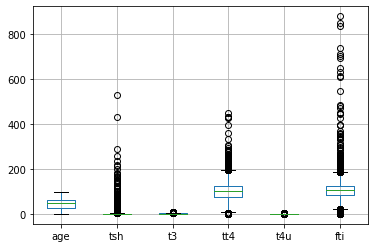

In [121]:
#cheking for outliers in the dataset 
boxplot = hospital.boxplot(column = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'])

we can see that there are many outliers in the fti comapred to the other columns i will not drop the outliers as they may play a significant role when it comes to my analysis and the modelling 

### EDA ANALYSIS

#### **PERFORMING UNIVARIATE ANALYSIS** 

#### a) Categorical and Categorical

In [122]:
#Frirst we need to group our data by status and has a sex
h1 = hospital.groupby(['status','sex'])
h1

In [123]:
#We need to determine the proportion of the status(hypothyroid or Negative) in regards to the gender of the person, basically
#we will use the size function to count the number of rows in each grouping
h1.size()

status       sex
hypothyroid  0         2
             F       102
             M        37
negative     0        71
             F      2017
             M       857
dtype: int64

In [124]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
h2 = h1.size().unstack()
h2

sex,0,F,M
status,,,
hypothyroid,2,102,37
negative,71,2017,857


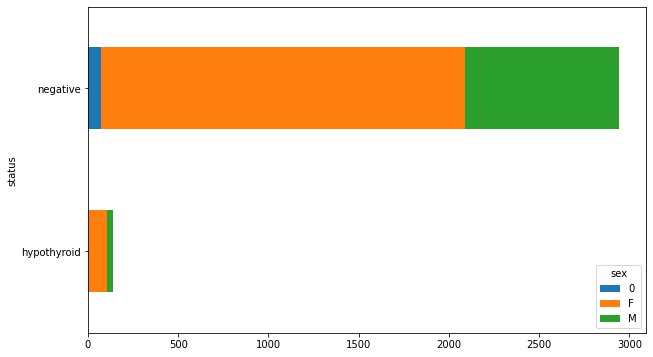

In [125]:
# We will then plot a tacked column chart to display our results of status(hypothyroid or Negative) in the two categroical variables
h2.plot(kind='barh', stacked=True, figsize=[10,6])

> from the above bar graph we can see that ther are more females comapred to males that do not have hypothyroid while, surprisingly we can see that there also a more females with hypothyroid compared to males

> And also we can see that we have more negative inputs this could lead to biasness in the data 


In [126]:
hospital.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
dtype: object

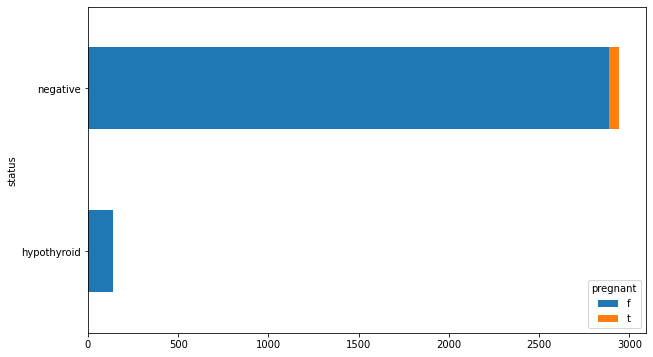

In [127]:
#Frirst we need to group our data by status and has a pregnant
preg = hospital.groupby(['status','pregnant'])
preg

#We need to determine the proportion of yes and no in the pregrancy column, basically
#we will use the size function to count the number of rows in each grouping
preg.size()

# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
preg2 = preg.size().unstack()
preg2

# We will then plot a tacked column chart to display our results of yes and no in the two categroical variables
preg2.plot(kind='barh', stacked=True, figsize=[10,6])

We cn see from the above plot that there were less pregrant people without hypothyroid comapres to the ones who were not pregnant and also there were no pregnant people with hypothyroid

#### b) Numerical variables

##### Measures of central tendancy 

In [128]:
#Mean
for column in hospital:
  # Selecting column contents by column name using [] operator
       columncontent = hospital[column]
       if column in numerical_col:
         print('Colunm Name', column)
         print('Column mean:', columncontent.mean())
         print()

Colunm Name age
Column mean: 43.85806869734284

Colunm Name tsh
Column mean: 4.952793259883344

Colunm Name t3
Column mean: 1.5075826312378469

Colunm Name tt4
Column mean: 100.25272197018795

Colunm Name t4u
Column mean: 0.901850291639662

Colunm Name fti
Column mean: 106.58227478937137



In [129]:
# median
for column in hospital:
  columncontent = hospital[column]
  if column in numerical_col:
    print("Column Name", column)
    print("Column Median", columncontent.median())
    print()

Column Name age
Column Median 48.0

Column Name tsh
Column Median 0.4

Column Name t3
Column Median 1.6

Column Name tt4
Column Median 100.0

Column Name t4u
Column Median 0.94

Column Name fti
Column Median 105.0



 Measures of central dispersion

In [130]:
# variance
for column in hospital:
  columncontent = hospital[column]
  if column in numerical_col:
    print("Column Name", column)
    print("Column Variance:", columncontent.var())
    print()

Column Name age
Column Variance: 637.0508376302887

Column Name tsh
Column Variance: 496.24008282721655

Column Name t3
Column Variance: 1.3904886763141115

Column Name tt4
Column Variance: 2682.794564711656

Column Name t4u
Column Variance: 0.1153339172884079

Column Name fti
Column Variance: 4288.255390739373



In [131]:
#cheking for skewnwess in my columns
# also cheking if the columns is postiviley or negative;y skewed
# defining a custom function called my_skew to check the skewness of each column

def my_skew():
  #iterating through each column name 
  for column in hospital:
    columncontent = hospital[column]#setting the column content to be the column name after each iteration
    if column in numerical_col:
      skew = columncontent.skew() #Getting the skewness of column content
      if skew > 0 :
        print("Positively skewed") 
      elif skew == 0 :
        print("Symmetric distribution")
      else:
        print("negatively skewed")

      print("Column Name", column, "....")
      print("Column skewness:", skew)
      print("\n")

#calling the function
print(my_skew())

negatively skewed
Column Name age ....
Column skewness: -0.35812334876853147


Positively skewed
Column Name tsh ....
Column skewness: 11.115661996068875


Positively skewed
Column Name t3 ....
Column skewness: 1.1273329291390457


Positively skewed
Column Name tt4 ....
Column skewness: 0.6392402012282863


negatively skewed
Column Name t4u ....
Column skewness: -0.9104506231742094


Positively skewed
Column Name fti ....
Column skewness: 3.7143206981869996


None


In [132]:
#Getting the Kurtosis of the columns
def kurt():
  for column in hospital:
    columncontent = hospital[column]
    if column in numerical_col:
      kurt = columncontent.kurt()
      if kurt > 3:
        print('It is leptokurtic distribution')
      elif kurt < 3:
        print('It is platykurtic distribution')
      else:
        print('It is mesokurtic distribution') 
      print("Column Name :", column)
      print("Kutorsis Value:", kurt)
      print("\n")
 
print(kurt())

It is platykurtic distribution
Column Name : age
Kutorsis Value: -0.9299783829997312


It is leptokurtic distribution
Column Name : tsh
Kutorsis Value: 179.28817042658284


It is leptokurtic distribution
Column Name : t3
Kutorsis Value: 4.600644022144946


It is leptokurtic distribution
Column Name : tt4
Kutorsis Value: 3.76395648227627


It is platykurtic distribution
Column Name : t4u
Kutorsis Value: 2.37171958511796


It is leptokurtic distribution
Column Name : fti
Kutorsis Value: 33.48138395334028


None


In [133]:
#describing my dataset
hospital.describe()

,age,tsh,t3,tt4,t4u,fti
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,43.858069,4.952793,1.507583,100.252722,0.901850,106.582275
std,25.239866,22.276447,1.179190,51.795700,0.339608,65.484772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,77.000000,0.820000,85.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,105.000000
75%,64.000000,1.700000,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


##### Distributions 

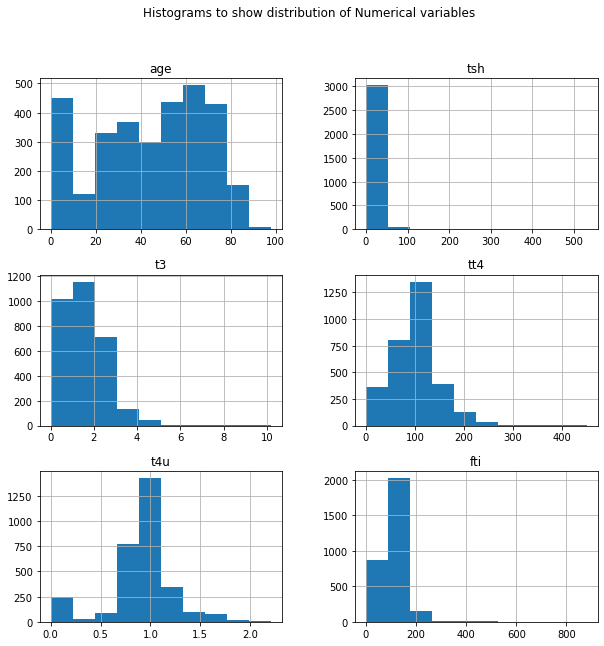

In [134]:
hospital.hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

> from the above distribution we can see that age is not necessarily skewwed to the left or right but for the others such as t3 it ha a right skew meaning that it is positively skewed and also the mode > median > mean

> We can also observe from the distribution that most of the columns are postively skewed 

#### **PERFORMING BIVARIATE ANALYSIS** 

#####  Scatter plots

Text(0, 0.5, 'fti')

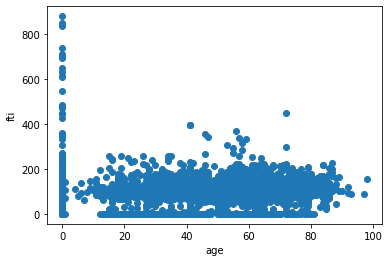

In [135]:
x = hospital['age']
y = hospital["fti"]
plt.scatter(x, y)
plt.xlabel("age")
plt.ylabel("fti")

No clear relationship between the age and fti here

Text(0, 0.5, 't3')

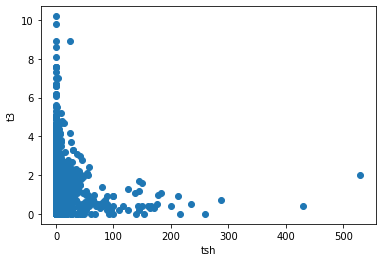

In [136]:
x = hospital['tsh']
y = hospital["t3"]
plt.scatter(x, y)
plt.xlabel("tsh")
plt.ylabel("t3")

the scatter plot above showas as that between the tsh and t3 there is no clear relationship

Text(0, 0.5, 'tt4')

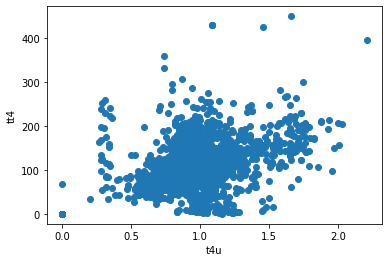

In [137]:
x = hospital['t4u']
y = hospital["tt4"]
plt.scatter(x, y)
plt.xlabel("t4u")
plt.ylabel("tt4")

the relationship between the t4u and the tt4 is unclear and will require further analysis before judging from the scatter plot a correlation matrix may help us answer the question

Text(0, 0.5, 'tt4')

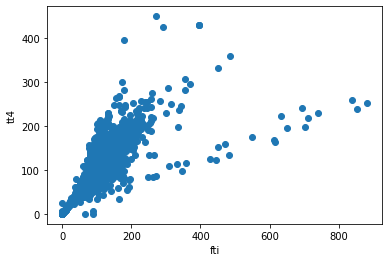

In [138]:
x = hospital['fti']
y = hospital["tt4"]
plt.scatter(x, y)
plt.xlabel("fti")
plt.ylabel("tt4")

there seems to be somewhat a clear postive relationship between the fti and the tt4 it seems as the fti incereases so does the tt4 in context we can say that they are directionally proportional

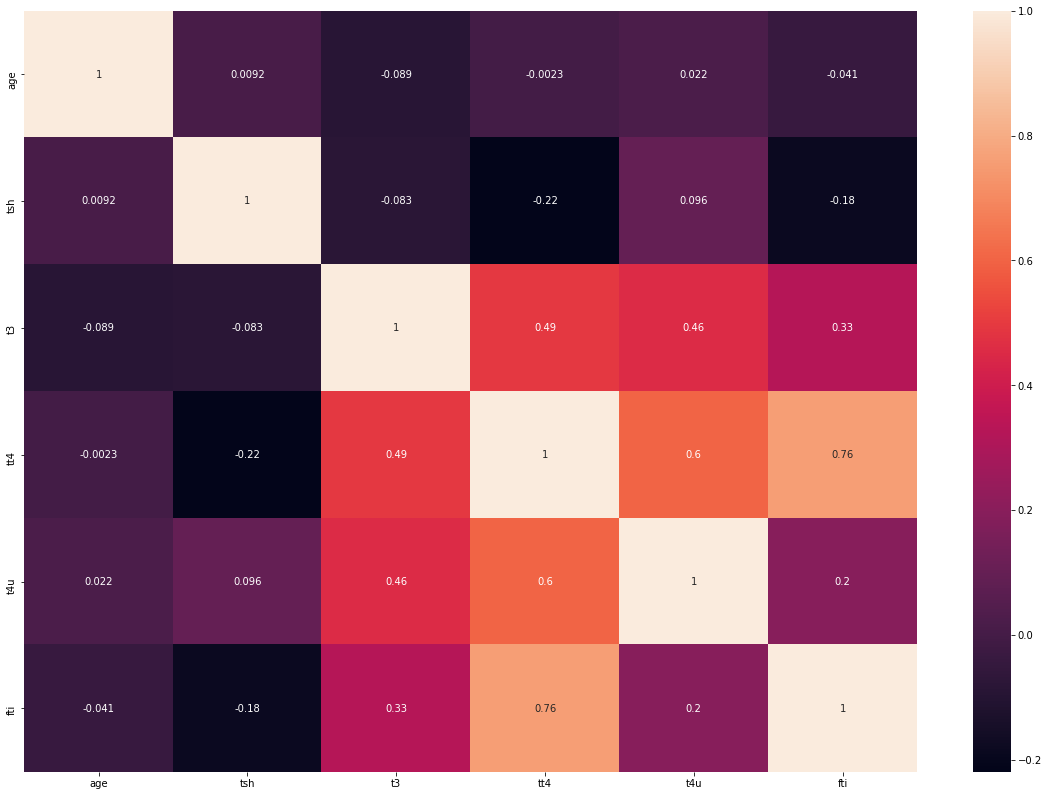

In [139]:
# showing correlation on a heatmap
plt.figure(figsize=(20,14))
sns.heatmap(hospital.corr(), annot = True)
plt.show()

> As seen in the correlation matrix we can see that tt4 and t4u are strongly postively correlated with a correlation of 0.6

> as we saw in the scatter plot tt4 and fti have a strong postive correlation of 0.76



####  **PERFORMING MULTIVARIATE ANALYSIS**

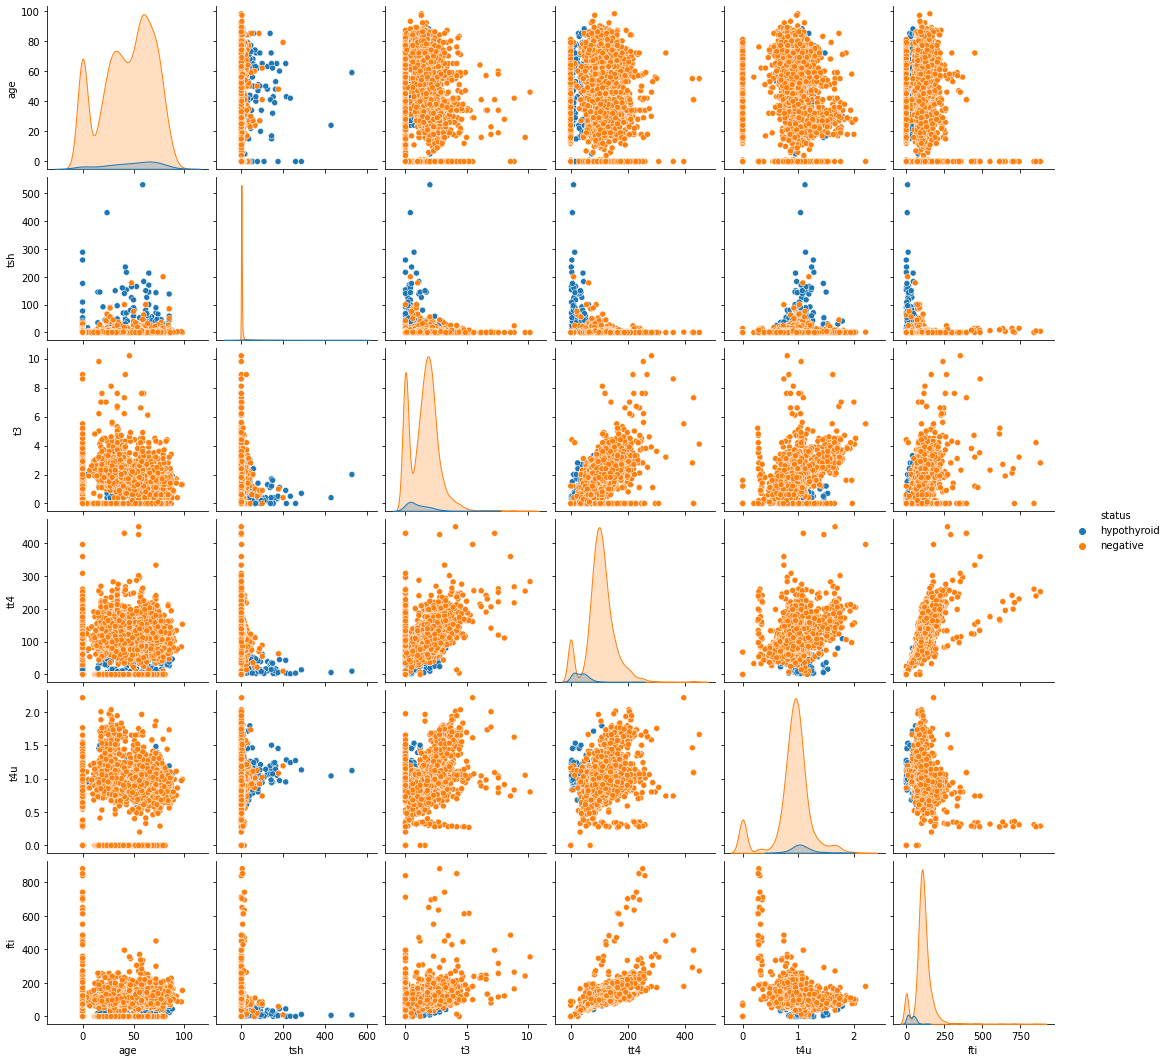

In [140]:
#Plotting a pair plot in accordace to status
sns.pairplot(hospital, hue = 'status')
plt.show()

## IMPLEMENTING THE SOLUTION

#### RANDOM FOREST CLASSIFIER

In [141]:
hospital.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

In [142]:
# choosing my matrix of features x and the dv
x = hospital.drop('status', axis =1)
y = hospital['status']

In [143]:
#encoding my categorical varibales in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
# X head
x.head()

,age,tsh,t3,tt4,t4u,fti,sex_F,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,tsh_measured_y,t3_measured_y,tt4_measured_y,t4u_measured_y,fti_measured_y,tbg_measured_y
0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24.0,0.0,0.2,4.0,1.00,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,24.0,430.0,0.4,6.0,1.04,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77.0,7.3,1.2,57.0,1.28,44.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [144]:
#encoding my categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Reshaping y to be vertical in-order to see wether the values have changed to numerical
print(y.reshape(len(y),1))

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [145]:
#splitting the dataset into the training set and the test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [146]:
#standardizing my data in-order to ensure that the data in internally consistent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [147]:
# Training the Random Forest classfication model on the training set 
from sklearn.ensemble import RandomForestClassifier
# changing the crieterion to entropy to measure the quality of the model
classifer = RandomForestClassifier(criterion='entropy', random_state=0)  
classifer.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [148]:
# Predicting the test set results
y_pred = classifer.predict(x_test)

#Making the Confusion Matrix
#The confusion matrix will show us the number of correct predictions and the number of incorrect predictions
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred)) # to get the accuracy of the test set predictions

[[ 27   8]
 [  6 731]]
0.9818652849740933


okay so with the random forest classifer we get an accuracy if 99%... this feels like the data might have been overfitted but also maybe standaradizing my data helped to ensure that my data is consistent hence improving the accuracy 

In [149]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018134715025906734
Mean Squared Error: 0.018134715025906734
Root Mean Squared Error: 0.13466519604525415


##### FEATURE IMPORTANCE

In [150]:
#checking for the most important features in our dataset 
#The importances are obtained similarly as before – stored to a data frame which is then sorted by the importance:
importances = pd.DataFrame(data={
    'Column Name': x.columns,
    'Importance': classifer.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                    Column Name  Importance
1                           tsh    0.314430
5                           fti    0.241255
3                           tt4    0.234685
2                            t3    0.053003
4                           t4u    0.052980
0                           age    0.020685
22               t4u_measured_y    0.012335
19               tsh_measured_y    0.010417
21               tt4_measured_y    0.009924
11            thyroid_surgery_t    0.006660
20                t3_measured_y    0.006540
12          query_hypothyroid_t    0.006277
10  on_antithyroid_medication_t    0.005005
8                on_thyroxine_t    0.004589
24               tbg_measured_y    0.004482
23               fti_measured_y    0.004207
6                         sex_F    0.003866
7                         sex_M    0.003136
15                       sick_t    0.001845
18                     goitre_t    0.001780
13         query_hyperthyroid_t    0.001431
9          query_on_thyroxine_t 

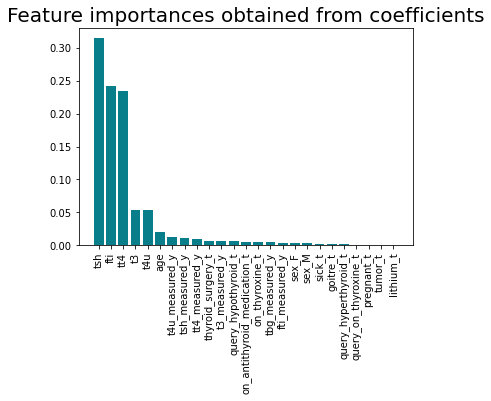

In [151]:
#visuallising the through a bar chart
plt.bar(x=importances['Column Name'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

From the above graph we can see which features are not important this includes

     1. lithium_t
     2. pregnant_t
     3. tumor_t
     4. query_on_thyroxine_t
     5. query_hyperthyroid_t
     6. goitre_t
     7. sick_t
     8. sex_M
     9. sex_F
     10. fti_measured_y
     11. tbg_measured_y

I will now create another model but without including those features above 

In [152]:
x.columns

Index(['age', 'tsh', 't3', 'tt4', 't4u', 'fti', 'sex_F', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'tsh_measured_y', 't3_measured_y', 'tt4_measured_y', 't4u_measured_y',
       'fti_measured_y', 'tbg_measured_y'],
      dtype='object')

In [153]:
# choosing my matrix of features x and the dv
x = x[['age','tsh', 't3', 'tt4', 't4u', 'fti', 'on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t','tsh_measured_y', 't3_measured_y', 'tt4_measured_y', 't4u_measured_y',]]
y = y

In [154]:
#splitting the dataset into the training set and the test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [155]:
#standardizing my data in-order to ensure that the data in internally consistent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [156]:
# Training the Random Forest classfication model on the training set 
from sklearn.ensemble import RandomForestClassifier
# changing the crieterion to entropy to measure the quality of the model
classifer = RandomForestClassifier(criterion='entropy', random_state=0)  
classifer.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [157]:
# Predicting the test set results
y_pred = classifer.predict(x_test)

#Making the Confusion Matrix
#The confusion matrix will show us the number of correct predictions and the number of incorrect predictions
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred)) # to get the accuracy of the test set predictions

[[ 29   6]
 [  6 731]]
0.9844559585492227


okay so with the random forest classifer after we remove the non-importnant features we get an accuracy if 98.4%... this feels abit more acceptable as the other varibaels could have caused overfitting in my model

##### VISUALISING 10 TREES IN RANDOM-FOREST

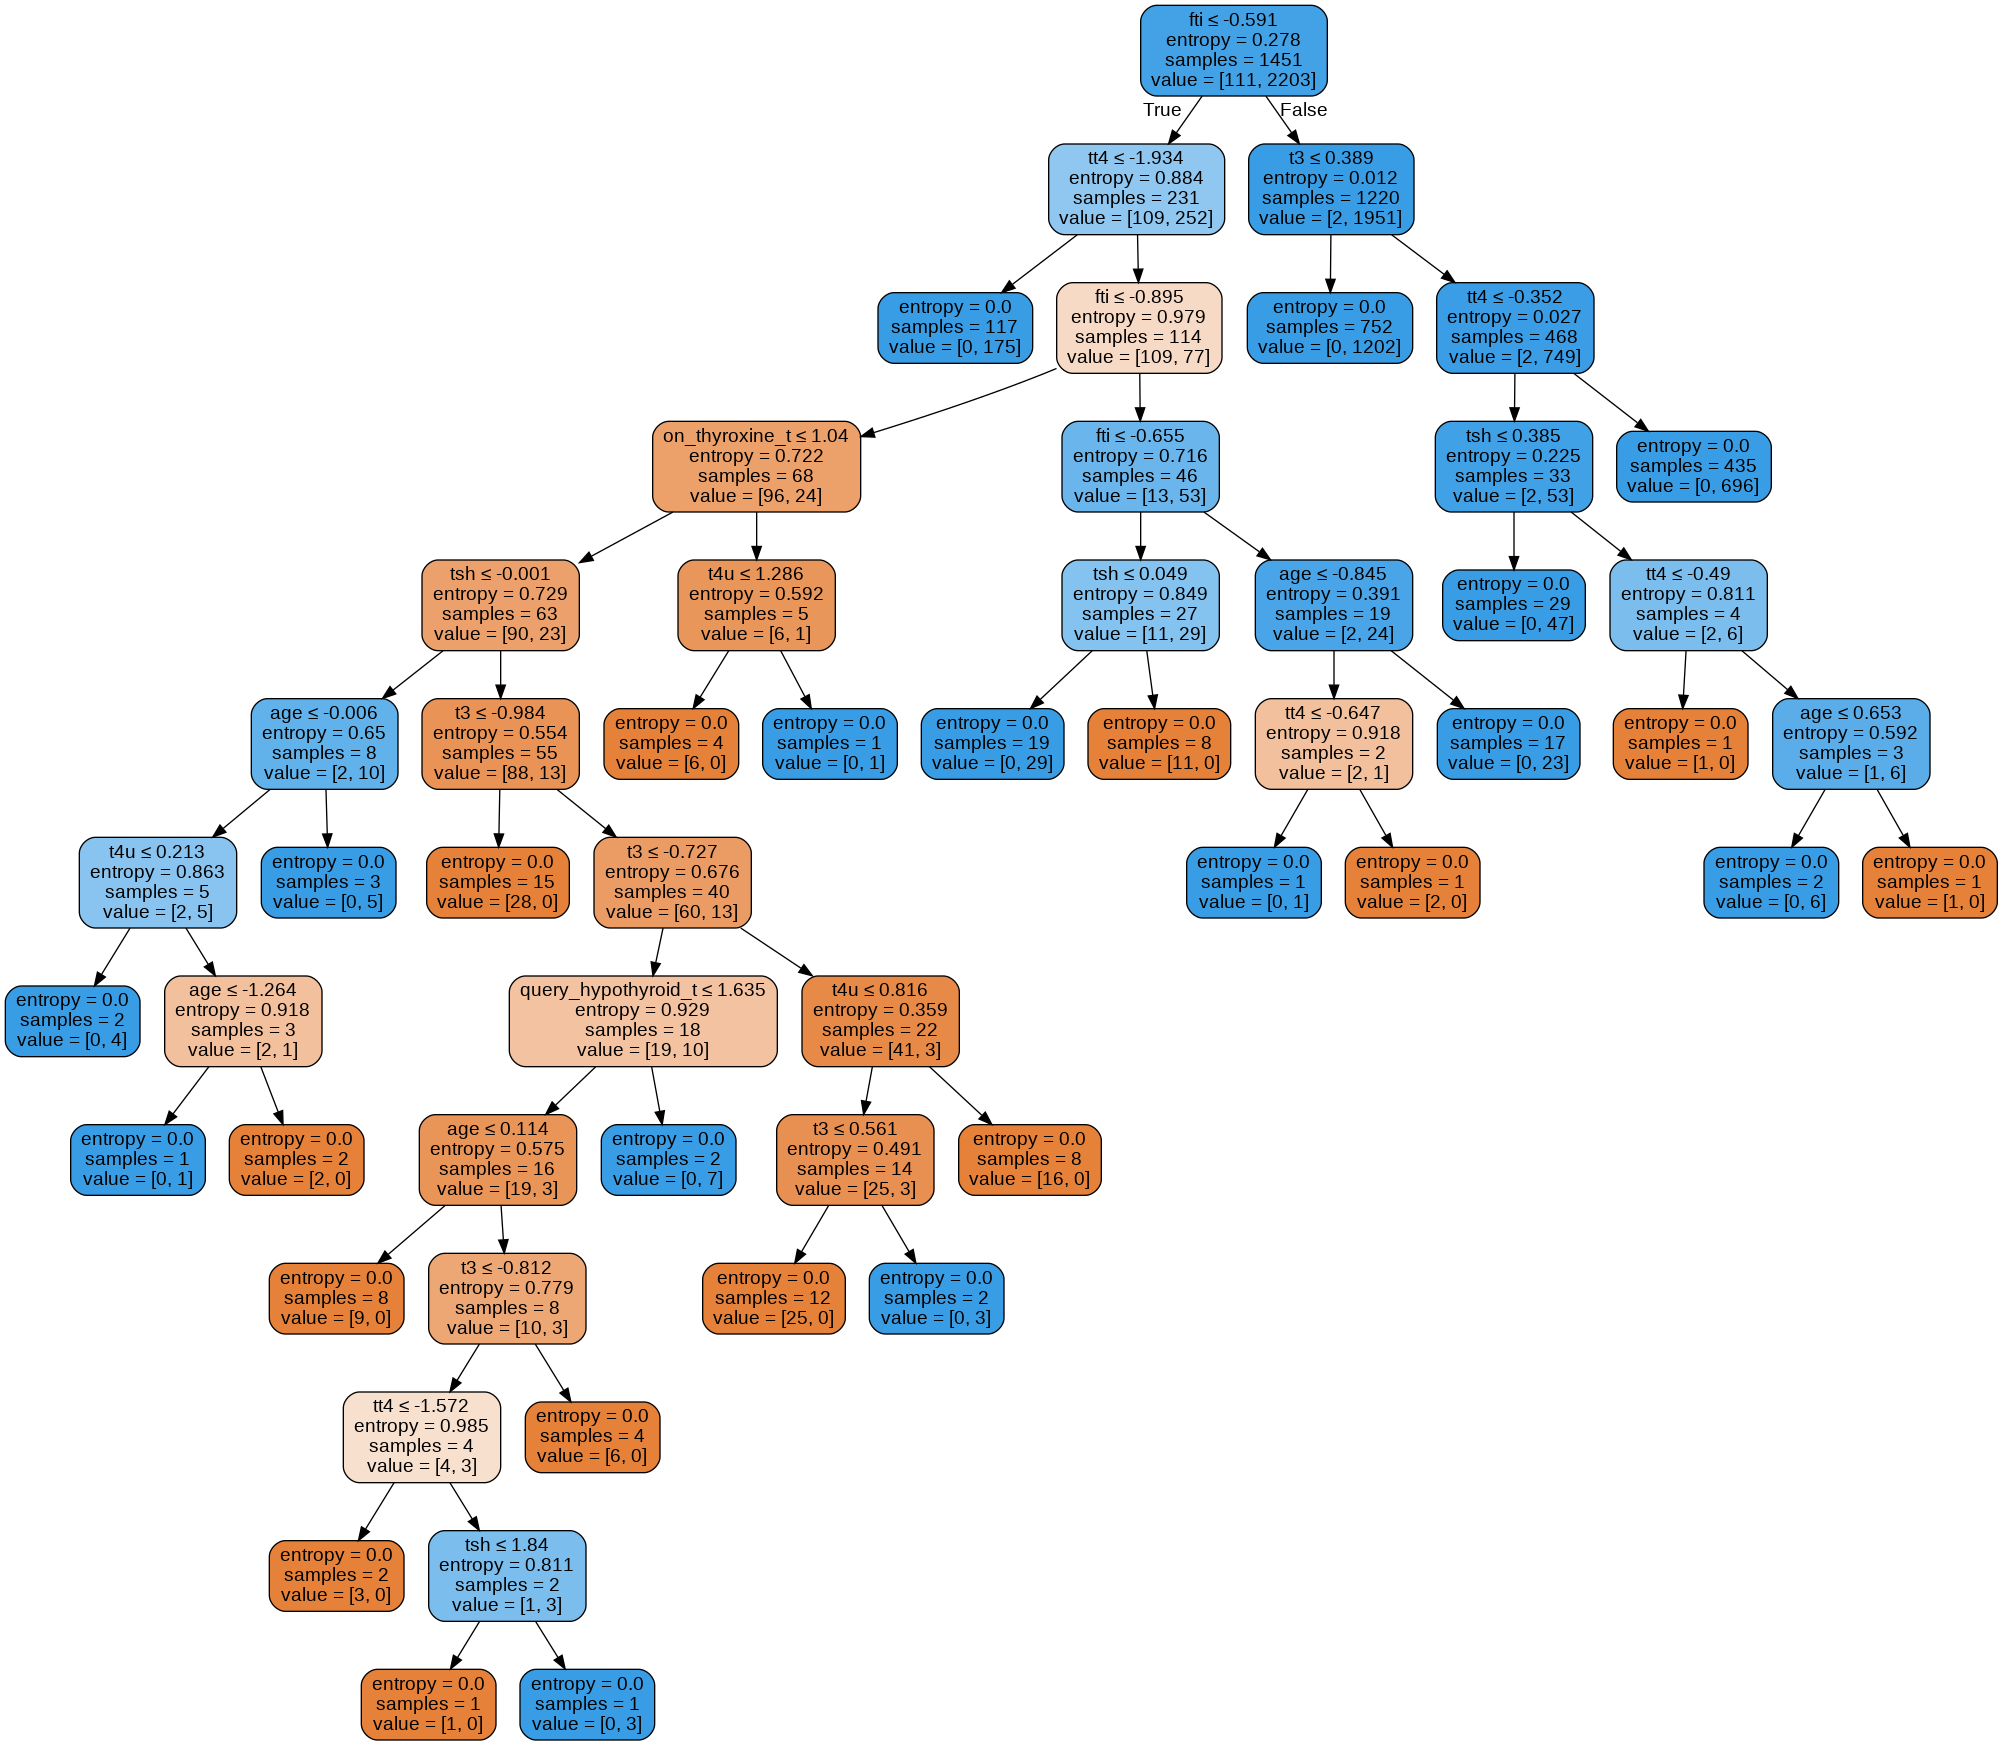

In [159]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


# pick a specific tree from the forest
tree = classifer.estimators_[10]
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### GRADIENT BOOSTING

In [160]:
from sklearn.ensemble import GradientBoostingRegressor

#getting the matrix of features x
x = hospital.drop('status', axis = 1)
y = hospital['status']

#encoding my categorical varibales in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
# X head
x.head()

#encoding my categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#splitting into training set and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [161]:
gbr = GradientBoostingRegressor(n_estimators=30, learning_rate=0.6, max_depth=2)
gbr.fit(x_train, y_train)
# Predicting the test set results
y_pred = gbr.predict(x_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7513611942779679

##### ADA BOOST CLASSIFIER

In [194]:
from sklearn.ensemble import AdaBoostClassifier

#getting the matrix of features x
x = hospital.drop('status', axis = 1)
y = hospital['status']

#encoding my categorical varibales in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
# X head
x.head()

#encoding my categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#splitting into training set and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [195]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

# Making the Confusion Matrix and getting the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ada.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 22   3]
 [  5 588]]
0.9870550161812298


##### FINAL ANALYSIS OF THE RANDOM FOREST


> Gradient boosting has the lowest accuracy when it comes to the modelling compared to Random Forest and ADA, but it surprisingly has the lowest RMSE

> Ada boost is the best with an accuracy of (98.7%)

> Randomforest has an accuracy of (98.4%), which comes in second after ada boost


#### SUPPORT VECTOR MACHINE

In [197]:
# importing required libraries
from sklearn.svm import SVC
# I will use the first 3 features that have the highest importance as my matrix of features x and the dv will be the status
x = x[["tsh", "fti", "tt4"]]
y = y

In [202]:
# I will create a list of the different kernels im goinng to compare, for loop to get the accuracies of the different kernels
polynomial = SVC(kernel = 'poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel = 'rbf')

# Putting the models into one list 
classifier = [polynomial, linear, rbf]

#creating a list of the classifier names which we will use in the for loop
classifier_name = ['Polynomial', 'Linear', 'rbf']

# so now we will use a for loop to iterate through the models and get the accuracies of each model
# You can use zip to iterate over multiple objects at the same time. zip returns tuples that can be unpacked as you go over the loop.
for model, name in zip(classifier, classifier_name):
  
  #Splitting into training and test set 
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  
  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)

  #Training the SVM model on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1 score is:", fbeta_score(y_test, y_pred, beta = 0.5)) 
  print("\n") 

The accuracy score for Polynomial is 0.9870550161812298
The f1 score is: 0.993288590604027
The f1 score is: 0.9902977584476412


The accuracy score for Linear is 0.9789644012944984
The f1 score is: 0.9890848026868178
The f1 score is: 0.9865996649916248


The accuracy score for rbf is 0.9870550161812298
The f1 score is: 0.993288590604027
The f1 score is: 0.9902977584476412




The main problem with the F1 score is that it gives equal weight to precision and recall. We might sometimes need to include domain knowledge in our evaluation where we want to have more recall or more precision.
To solve this, we can do this by creating a weighted F1 metric as below where beta manages the tradeoff between precision and recall.

From the above metrics we can see that both Polynomial(98.7%) and RBF(98.7%) have high accuracies and high f1 and fbeta scores compared to Linear(97%), so we can say that Linear should not be used in this modelling

##### HYPERPARAMETER TUNING AND CROSS VALIDATION

In [167]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
#matrix of features x and the dv
x = x[["tsh", "fti", "tt4"]]
y = y


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#we are going to have two dictionaries in the list because the gamma parameter can only be used with a rbf kernel 
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3,
                                                                       0.4, 0.5, 0.6,
                                                                       0.7, 0.8, 0.9]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly'], 'degree': [1, 2, 3], 'gamma': [0.1,0.2,0.3,
                                                                                             0.4,0.5,0.6,
                                                                                             0.7,0.8,0.9]}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Accuracy: 98.23 %
Standard Deviation of the cross validation: 0.78 %


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 98.40 %
Best Parameters: {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}


Analysis

> From the above output we can see that the sd is 0.78% this basically represents the variance of the accuracies

> We can also see that before applying any parameter tuning the rbf gives us an accuracy of 98.23%

> After crossvalidation on 10 test folds we can see the best accuracy we get is 98.40%

> The best hyperparamerters are 
      
       1. C(REGULARIZATION PARAMETER) = 1
       3. Gamma(Kernel Coeff) = 0.6
       4. Kernel(kernel type) = RBF 

##### REMODELLING WITH THE HYPERPARAMETERS

In [207]:
#matrix of features x and the dv
x = x[["tsh", "fti", "tt4"]]
y = y


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 0.6)
classifier.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [208]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred)) # to get the accuracy of the test set predictions

[[ 22  10]
 [  1 739]]
0.9857512953367875


After applying the hyperparameters the accuracy increased to 98.5% compared to before